# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('train-salary.csv')

In [3]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


# Data cleaning

In [5]:
salary = df.copy()

In [6]:
salary.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
salary.columns = salary.columns.str.strip()

In [8]:
salary.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
salary.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
salary.shape

(18981, 7)

In [11]:
salary = salary.drop(['GrossPay'],axis=1)

In [12]:
salary

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00


In [13]:
salary['HireDate'] = salary.groupby('Agency')['HireDate'].ffill()

In [14]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [15]:
salary['AnnualSalary'] = salary['AnnualSalary'].apply(lambda x: float(str(x).replace("$","")))

In [16]:
salary

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [17]:
salary = salary.drop(['Name'],axis=1)

In [18]:
salary

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0
...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0


In [19]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18981 non-null  object 
 1   AgencyID      18981 non-null  object 
 2   Agency        18981 non-null  object 
 3   HireDate      18981 non-null  object 
 4   AnnualSalary  18981 non-null  float64
dtypes: float64(1), object(4)
memory usage: 741.6+ KB


In [20]:
salary[["month", "day", "year"]] = salary["HireDate"].str.split("/", expand = True)

In [21]:
salary

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,06,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,09,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,07,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,07,24,2013
...,...,...,...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,05,21,2014
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,05,21,2014
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,12,17,2013
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,01,23,2013


# Exploratory Data Analysis

In [22]:
salary.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: JobTitle, Length: 1075, dtype: int64

In [23]:
salary.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [24]:
salary.Agency.value_counts()

Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [25]:
x = salary.groupby('Agency')['AgencyID'].nunique().sort_values()
print(x)

y = salary.groupby('AgencyID')['Agency'].nunique().sort_values()
print(y)

Agency
HLTH-Heatlh Dept. Locatio      1
M-R Labor Commissioner         1
M-R Cable & Comm               1
Mayor's Office                 1
HLTH-Heatlh                    1
                            ... 
Enoch Pratt Free Library      57
Fire Department               69
Youth Summer                  77
Police Department            133
Youth Summer                 424
Name: AgencyID, Length: 65, dtype: int64
AgencyID
A01001    1
W02236    1
W02235    1
W02234    1
W02233    1
         ..
A70104    1
A70103    1
A70101    1
A75001    1
W07905    1
Name: Agency, Length: 1177, dtype: int64


In [26]:
y.unique()

array([1], dtype=int64)

In [27]:
salary.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

<AxesSubplot: >

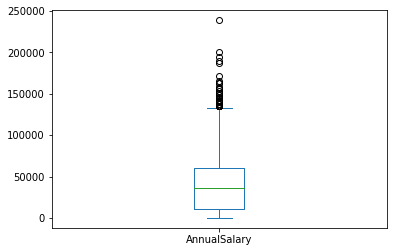

In [28]:
salary.AnnualSalary.plot.box()

In [29]:
salary.AnnualSalary.describe()

count     18981.000000
mean      39756.791968
std       25173.051216
min           0.000000
25%       11310.000000
50%       36400.000000
75%       60598.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [30]:
salary = salary[salary['AnnualSalary']<140000]

<AxesSubplot: >

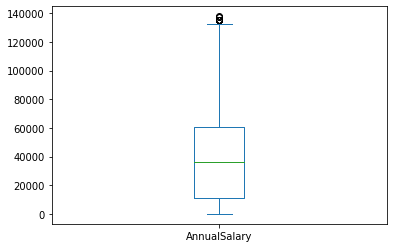

In [31]:
salary.AnnualSalary.plot.box()

<ipython-input-32-643ed11cec26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary.AnnualSalary)


<AxesSubplot: xlabel='AnnualSalary', ylabel='Density'>

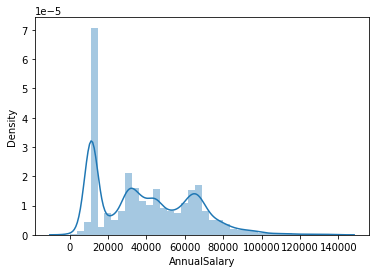

In [32]:
sns.distplot(salary.AnnualSalary)

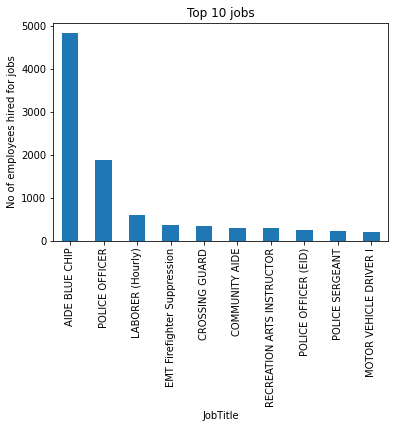

In [33]:
salary.groupby(['JobTitle'])['JobTitle'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of employees hired for jobs')
plt.title('Top 10 jobs')
plt.show()

<AxesSubplot: xlabel='JobTitle'>

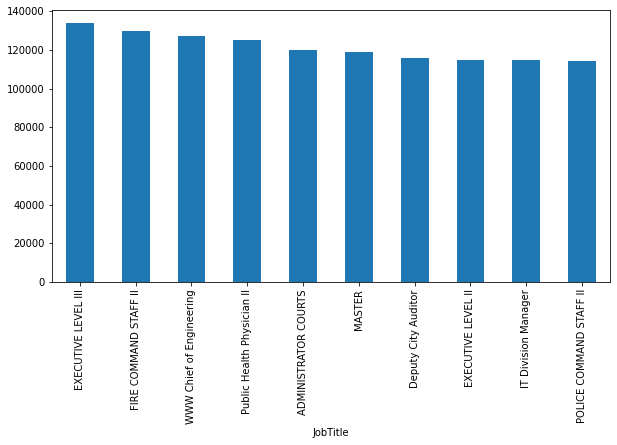

In [34]:
## top 10 jobs that fetch higher salary
plt.figure(figsize=(10,5))
salary.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot: xlabel='Agency'>

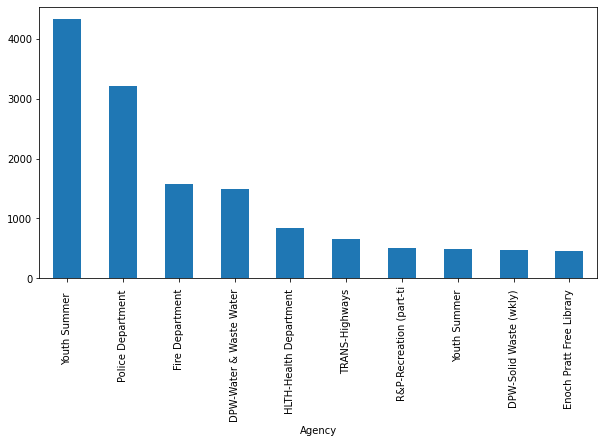

In [35]:
## top 10 agencies that have hired higher number of employees
plt.figure(figsize=(10,5))
salary.groupby(['Agency'])['Agency'].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot: xlabel='Agency'>

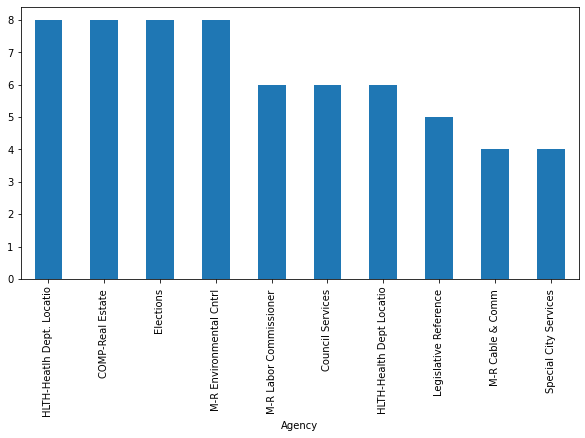

In [36]:
## top 10 agencies that have hired minimum number of employees
plt.figure(figsize=(10,5))
salary.groupby(['Agency'])['Agency'].count().sort_values(ascending=False).tail(10).plot.bar()

<AxesSubplot: xlabel='AgencyID'>

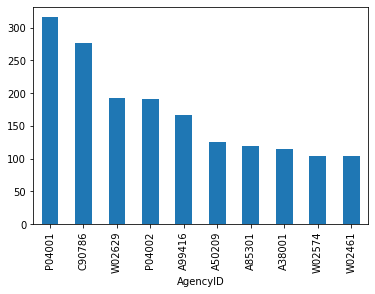

In [37]:
## which agency id have higher number of employees working

salary.groupby(['AgencyID'])['AgencyID'].count().sort_values(ascending=False).head(10).plot.bar()

In [38]:
salary['year']=salary['year'].astype('int32')

<ipython-input-38-84113e3bca03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['year']=salary['year'].astype('int32')


(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020')])

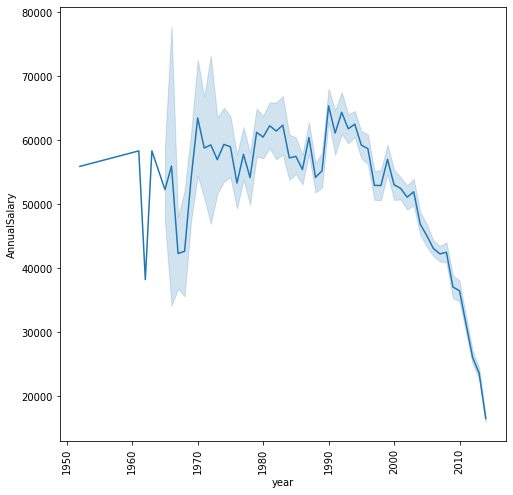

In [39]:
### year on year hirings and payouts
plt.figure(figsize=(8,8))
sns.lineplot(x=salary.year, y=salary.AnnualSalary,sort=True)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='month'>

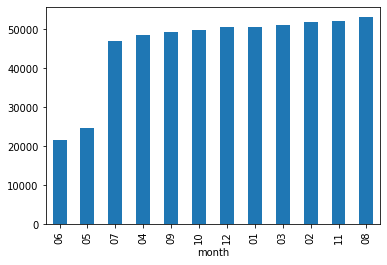

In [40]:
## if month have an impact over salaary
salary.groupby(['month'])['AnnualSalary'].mean().sort_values().plot.bar()

<AxesSubplot: xlabel='month'>

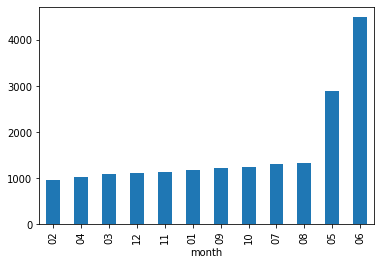

In [41]:
## in which month higher number of people were hired
salary.groupby(['month'])['month'].count().sort_values().plot.bar()

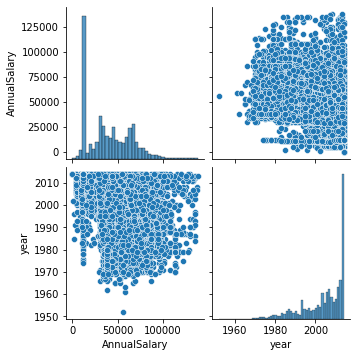

In [42]:
## multivariate analysis
sns.pairplot(salary)

In [43]:
salary

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,06,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,09,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,07,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,07,24,2013
...,...,...,...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,05,21,2014
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,05,21,2014
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,12,17,2013
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,01,23,2013


In [44]:
salary['month']=salary['month'].astype('int32')

<ipython-input-44-93f3c1583dc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['month']=salary['month'].astype('int32')


In [45]:
salary['day']=salary['day'].astype('int32')

<ipython-input-45-2709ea3ad534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['day']=salary['day'].astype('int32')


<AxesSubplot: >

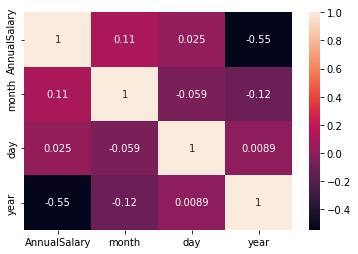

In [46]:
sns.heatmap(salary.corr(),annot=True)

# FEATURE ENGINEERING , mean encoding

In [47]:
mean_job = salary.groupby('JobTitle')['AnnualSalary'].mean()

In [48]:
mean_job

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1069, dtype: float64

In [49]:
salary['JobTitle'] = salary['JobTitle'].map(mean_job)

<ipython-input-49-0057877fa3aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['JobTitle'] = salary['JobTitle'].map(mean_job)


In [50]:
mean_agency = salary.groupby('Agency')['AnnualSalary'].mean()
salary['Agency'] = salary['Agency'].map(mean_agency)

<ipython-input-50-91d9acc58b24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['Agency'] = salary['Agency'].map(mean_agency)


In [51]:
mean_agencyID = salary.groupby('AgencyID')['AnnualSalary'].mean()
salary['AgencyID'] = salary['AgencyID'].map(mean_agencyID)

<ipython-input-51-995eb4e7ba6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['AgencyID'] = salary['AgencyID'].map(mean_agencyID)


In [52]:
salary

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,11313.967200,11310.000000,11310.270645,06/10/2013,11310.0,6,10,2013
1,47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,9,25,2006
3,57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,7,23,2009
4,44531.160494,44012.307229,61575.070137,07/24/2013,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,05/21/2014,11310.0,5,21,2014
18977,11313.967200,11310.000000,11346.315789,05/21/2014,11310.0,5,21,2014
18978,44531.160494,44012.307229,61575.070137,12/17/2013,43999.0,12,17,2013
18979,60588.139335,60203.340426,61575.070137,01/23/2013,44104.0,1,23,2013


In [53]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18955 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18955 non-null  float64
 1   AgencyID      18955 non-null  float64
 2   Agency        18955 non-null  float64
 3   HireDate      18955 non-null  object 
 4   AnnualSalary  18955 non-null  float64
 5   month         18955 non-null  int32  
 6   day           18955 non-null  int32  
 7   year          18955 non-null  int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 1.6+ MB


In [54]:
salary.drop(['HireDate'],axis=1,inplace=True)

c:\users\soham\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
salary

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,11313.967200,11310.000000,11310.270645,11310.0,6,10,2013
1,47443.500000,46667.000000,51495.424242,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,68300.0,9,25,2006
3,57940.000000,48071.851064,39980.900360,62000.0,7,23,2009
4,44531.160494,44012.307229,61575.070137,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,5,21,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,5,21,2014
18978,44531.160494,44012.307229,61575.070137,43999.0,12,17,2013
18979,60588.139335,60203.340426,61575.070137,44104.0,1,23,2013


# Feature Scaling

In [56]:
salary_cpy = salary.copy()

In [57]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler()
salary_cpy[salary_cpy.columns] = data.fit_transform(salary_cpy[salary_cpy.columns])

# Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(salary_cpy,test_size=0.20,random_state=42)

In [59]:
train

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
4139,-1.165848,-1.274022,-1.348898,-1.141755,-0.127520,0.389123,0.857453
3981,0.865765,0.617526,1.048643,1.040046,0.212014,0.627394,-0.587808
11051,0.383415,0.275895,0.599389,0.241870,0.891081,0.269987,0.182998
7851,-0.898054,-0.315000,0.017195,-0.989549,1.230615,-1.397915,-0.491458
5646,0.865765,0.728849,1.048643,0.675114,0.891081,1.580481,0.472050
...,...,...,...,...,...,...,...
11297,0.865765,1.028711,1.048643,0.848153,-0.467054,-0.802236,0.279349
11977,-1.165848,-1.274022,-1.348898,-1.141755,-0.127520,-0.683100,0.857453
5398,0.767932,1.481570,1.206022,0.794699,0.212014,-1.278779,-1.551316
861,0.330254,0.484298,0.018640,0.323383,-0.127520,-0.563964,0.761103


In [60]:
test

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
12254,0.865765,0.858291,1.048643,0.848153,-1.485655,-1.278779,0.279349
16780,-0.368871,0.053255,0.017195,-0.316933,-0.806587,1.223073,-0.009704
8258,-1.165848,-1.274022,-1.348898,-1.141755,-0.127520,-0.444828,0.761103
16229,-0.375926,-0.240673,-0.258411,-0.329570,-0.127520,1.699617,0.375699
14077,-0.742966,-0.363542,-0.270444,-0.758615,1.909682,-1.278779,0.761103
...,...,...,...,...,...,...,...
18746,0.103456,0.191539,0.141921,0.166332,-1.825188,0.627394,-1.840368
16795,-1.165848,-1.274022,-1.347179,-1.141755,-0.467054,0.627394,0.953804
9339,-1.429965,-1.541966,0.018640,-1.413627,-0.127520,0.865666,0.953804
9369,-1.165848,-1.274022,-1.348898,-1.141755,-0.127520,-0.444828,0.761103


In [61]:
salary

,JobTitle,AgencyID,Agency,AnnualSalary,month,day,year
0,11313.967200,11310.000000,11310.270645,11310.0,6,10,2013
1,47443.500000,46667.000000,51495.424242,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,68300.0,9,25,2006
3,57940.000000,48071.851064,39980.900360,62000.0,7,23,2009
4,44531.160494,44012.307229,61575.070137,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,5,21,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,5,21,2014
18978,44531.160494,44012.307229,61575.070137,43999.0,12,17,2013
18979,60588.139335,60203.340426,61575.070137,44104.0,1,23,2013


In [62]:
y_train = train.pop('AnnualSalary')
x_train = train

In [63]:
y_test = test.pop('AnnualSalary')
x_test = test

In [64]:
x_test

,JobTitle,AgencyID,Agency,month,day,year
12254,0.865765,0.858291,1.048643,-1.485655,-1.278779,0.279349
16780,-0.368871,0.053255,0.017195,-0.806587,1.223073,-0.009704
8258,-1.165848,-1.274022,-1.348898,-0.127520,-0.444828,0.761103
16229,-0.375926,-0.240673,-0.258411,-0.127520,1.699617,0.375699
14077,-0.742966,-0.363542,-0.270444,1.909682,-1.278779,0.761103
...,...,...,...,...,...,...
18746,0.103456,0.191539,0.141921,-1.825188,0.627394,-1.840368
16795,-1.165848,-1.274022,-1.347179,-0.467054,0.627394,0.953804
9339,-1.429965,-1.541966,0.018640,-0.127520,0.865666,0.953804
9369,-1.165848,-1.274022,-1.348898,-0.127520,-0.444828,0.761103


# Model Building

In [65]:
#### model building
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

# Prediction

In [68]:
y_pred = lr.predict(x_test)

In [69]:
y_pred

array([ 0.7807824 , -0.32602201, -1.15633339, ..., -1.53767345,
       -1.15633339, -1.03977512])

In [70]:
y_test

12254    0.848153
16780   -0.316933
8258    -1.141755
16229   -0.329570
14077   -0.758615
           ...   
18746    0.166332
16795   -1.141755
9339    -1.413627
9369    -1.141755
15863   -1.156653
Name: AnnualSalary, Length: 3791, dtype: float64

# Testing accuracy

In [71]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)

0.0374923494849871

In [72]:
r2_score(y_test,y_pred)

0.9624833294909726